<a href="https://www.kaggle.com/code/singhayush16/car-price-prediction?scriptVersionId=140305325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
car_price=pd.read_csv('https://github.com/codebasics/py/raw/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
car_price

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [58]:
new=pd.get_dummies(car_price['Car Model'])

In [59]:
new

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [60]:
final=pd.concat([car_price,new],axis=1)

In [61]:
final

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


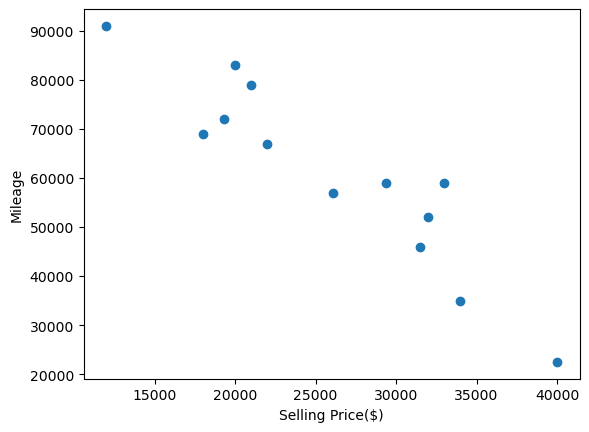

In [62]:
plt.scatter(final['Sell Price($)'],final['Mileage'])
plt.xlabel('Selling Price($)')
plt.ylabel('Mileage')
plt.show()

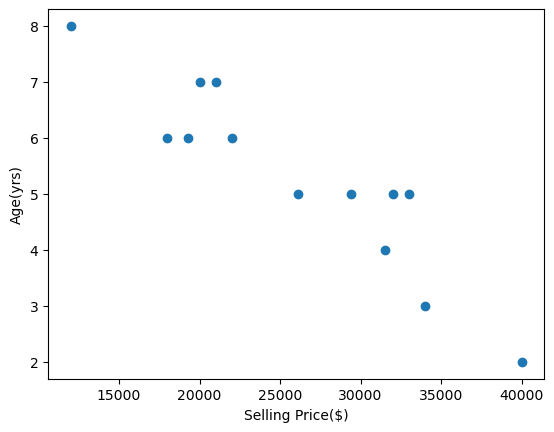

In [63]:
plt.scatter(final['Sell Price($)'],final['Age(yrs)'])
plt.xlabel('Selling Price($)')
plt.ylabel('Age(yrs)')
plt.show()

*As we can see that their is Linear Relation among dependent and independent variables.*

In [64]:
final.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')

In [77]:
X=final[['Mileage','Age(yrs)','Audi A5','BMW X5']]
y=final['Sell Price($)']

In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [79]:
model.score(X,y)

0.9417050937281082

*The Model is **94.17%** accurate.*

**Price of mercedez benz that is 4 yr old with mileage 45000**

In [80]:
model.predict([[45000,4,0,0]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

**Price of BMW X5 that is 7 yr old with mileage 86000**

In [81]:
model.predict([[86000,7,0,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])